In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
maze = np.array(
    [
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0],
    ]
)

In [36]:
actions = ["up", "down", "left", "right"]

In [37]:
q_table = np.zeros((*maze.shape, len(actions)))

In [38]:
start = (0, 0)
goal = (7, 7)
rewards = np.full(maze.shape, -1)
rewards[goal] = 1

In [39]:
def get_next_state(state, action):
    row, col = state
    if action == "up":
        row = max(row-1,0)
    if action == "down":
        row = min(row+1,maze.shape[0]-1)
    if action == "left":
        col = max(col-1,0)
    if action == "right":
        col = min(col+1,maze.shape[1]-1)
    return row, col

In [40]:
def choose_action(state, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        return actions[np.argmax(q_table[state])]

In [41]:
""" Training the agent """

num_episodes = 1000
epsilon = 0.1
alpha = 0.1
gamma = 0.9

for episode in range(num_episodes):
    state = start
    while state != goal:
        action = choose_action(state, epsilon)
        next_state = get_next_state(state, action)
        reward = rewards[next_state]
        q_table[state][actions.index(action)] += (
            alpha * (reward + gamma * np.max(q_table[next_state]))
            - q_table[state][actions.index(action)]
        )
        state = next_state
    print("Episode", episode, "Reward", reward)

Episode 0 Reward 1
Episode 1 Reward 1
Episode 2 Reward 1
Episode 3 Reward 1
Episode 4 Reward 1
Episode 5 Reward 1
Episode 6 Reward 1
Episode 7 Reward 1
Episode 8 Reward 1
Episode 9 Reward 1
Episode 10 Reward 1
Episode 11 Reward 1
Episode 12 Reward 1
Episode 13 Reward 1
Episode 14 Reward 1
Episode 15 Reward 1
Episode 16 Reward 1
Episode 17 Reward 1
Episode 18 Reward 1
Episode 19 Reward 1
Episode 20 Reward 1
Episode 21 Reward 1
Episode 22 Reward 1
Episode 23 Reward 1
Episode 24 Reward 1
Episode 25 Reward 1
Episode 26 Reward 1
Episode 27 Reward 1
Episode 28 Reward 1
Episode 29 Reward 1
Episode 30 Reward 1
Episode 31 Reward 1
Episode 32 Reward 1
Episode 33 Reward 1
Episode 34 Reward 1
Episode 35 Reward 1
Episode 36 Reward 1
Episode 37 Reward 1
Episode 38 Reward 1
Episode 39 Reward 1
Episode 40 Reward 1
Episode 41 Reward 1
Episode 42 Reward 1
Episode 43 Reward 1
Episode 44 Reward 1
Episode 45 Reward 1
Episode 46 Reward 1
Episode 47 Reward 1
Episode 48 Reward 1
Episode 49 Reward 1
Episode 50

In [42]:
state = start
path = [state]
while state!=goal:
    action = actions[np.argmax(q_table[state])]
    state = get_next_state(state, action)
    path.append(state)
path

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7)]

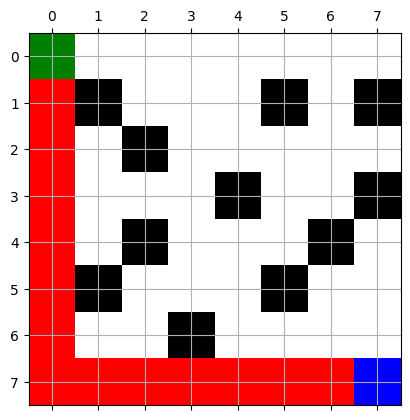

In [43]:
maze_copy = maze.copy()
for position in path:
    maze_copy[position] = 2
maze_copy[start] = 3
maze_copy[goal] = 4
cmap = plt.cm.colors.ListedColormap(['white', 'black', 'red', 'green', 'blue'])
plt.matshow(maze_copy, cmap=cmap)
plt.xticks(np.arange(maze.shape[1]))
plt.yticks(np.arange(maze.shape[0]))
plt.grid(True)
plt.show()
